# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549327325.84


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 20
max_edges = 1000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 1000 edges out of 229338 available (0.44% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,323.000000,323,323,323,318,319,0.0,100,222,222,222,217,186,159,71,3,0.0,0.0,0.0,320,320,320,323.0,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,3.230000e+02,323.000000,323.000000,323.000000
unique,NaN,323,323,281,2,80,NaN,98,1,1,7,16,24,37,25,2,NaN,NaN,NaN,320,320,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Introduction to Differential Geometry of Space...,https://www.amazon.com.br/dp/0521864496/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,25 de agosto de 2017,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Matemática Pura,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,0465054722,978-0070542341,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,5,205,60,NaN,2,222,222,191,166,94,28,9,2,NaN,NaN,NaN,1,1,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1223.699690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,291.249474,138728.398134,444.309082,4.770155,4.618436,16.569220,23.543504,2.465214,518.774013,2.021522e+09,0.031843,5.702786,0.011494
std,983.671554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,360.652378,94956.841388,255.629856,3.284347,0.299609,2.560235,2.103398,1.150573,212.103858,1.181879e+09,0.044428,12.686554,0.032751
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.970000,1053.000000,48.000000,1.000000,1.000000,10.000000,17.000000,0.500000,40.800000,1.612626e+07,0.000665,1.000000,0.000000
25%,94.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,59.735000,66626.500000,282.500000,4.760000,4.621333,14.600000,22.200000,1.600000,381.000000,1.053793e+09,0.005899,1.000000,0.000000
50%,1713.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,127.160000,141485.441558,388.000000,4.760000,4.621333,16.000000,23.400000,2.300000,523.418147,1.958414e+09,0.015397,2.000000,0.002660
75%,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,437.280000,153475.500000,560.000000,4.760000,4.621333,18.400000,24.700000,3.200000,649.000000,2.932558e+09,0.041038,5.000000,0.008063


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.00,4.000000,14.0,21.0,0.6,181.0,3564330554,0.060815,19,0.025068
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.00,4.600000,14.6,21.0,1.9,363.0,1309098117,0.222710,62,0.086719
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,4.76,4.621333,14.4,20.8,0.8,200.0,1260550007,0.228632,59,0.105900
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.00,4.500000,13.7,21.5,1.6,381.0,4012708477,0.074234,18,0.053103
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.00,4.500000,13.8,21.8,4.0,939.0,3891707921,0.302139,88,0.217680
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.00,5.000000,13.8,21.5,2.2,581.0,2030201243,0.147241,43,0.075566
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,4.76,4.621333,13.7,21.5,0.8,159.0,744636978,0.032750,9,0.009491
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.00,5.000000,13.8,21.6,1.0,159.0,425205287,0.013043,10,0.073041
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,4.76,4.621333,13.6,20.3,2.3,522.0,1246026773,0.089906,23,0.027196
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciên

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.201238390093
Train features shape:  (258, 478)
Train target shape:  (258,)
Test features shape:  (65, 478)
Test target shape:  (65,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 282.11368217054263
Median parice; R$ 123.705


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.5807552982404298
RF relative abs std:  0.11470404395059364
Baseline (average) relative mean:  2.375333540887989
Baseline (average) relative std:  0.4591723350279755
Baseline (median) relative mean:  0.9659415100074815
Baseline (median) relative std:  0.18002327327760956
=== Absolute
RF abs mean:  135.9841283846154
RF abs std:  45.966106480234224
Baseline (average) mean:  246.48812909958255
Baseline (average) std:  51.583897793972874
Baseline (median) mean:  219.41890307692307
Baseline (median) std:  53.05884309830867


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,coverType_Capa dura,25.792730,3.810011,0.147716
1,"authors_Lars V. Ahlfors (Autor),",10.382277,4.841013,0.466277
2,publisher_Cengage Learning,6.247957,2.658143,0.425442
3,pages,5.149288,1.572741,0.305429
4,ranking,4.729845,1.542644,0.326151
5,authors_S. M. Neill C. M. Ridley (Autor),4.017799,1.765518,0.439424
6,publisher_Garland Publishing,3.394254,1.582934,0.466357
7,sha256_id,3.191207,1.026221,0.321578
8,publisher_McGraw-Hill Science/Engineering/Math,2.453662,2.265626,0.923365
9,width,2.199231,0.503344,0.228873


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [26, 26, 26, 26, 26, 26, 26, 26, 25, 25]
X shape:  (258, 478)
y shape:  (258,)


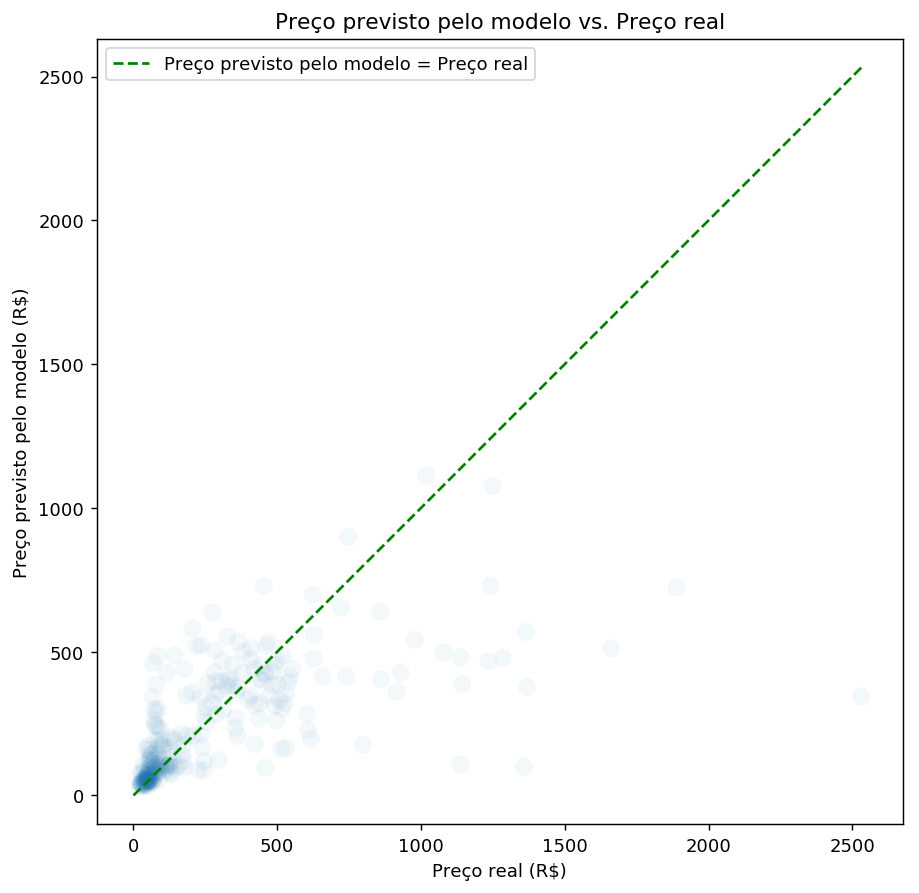

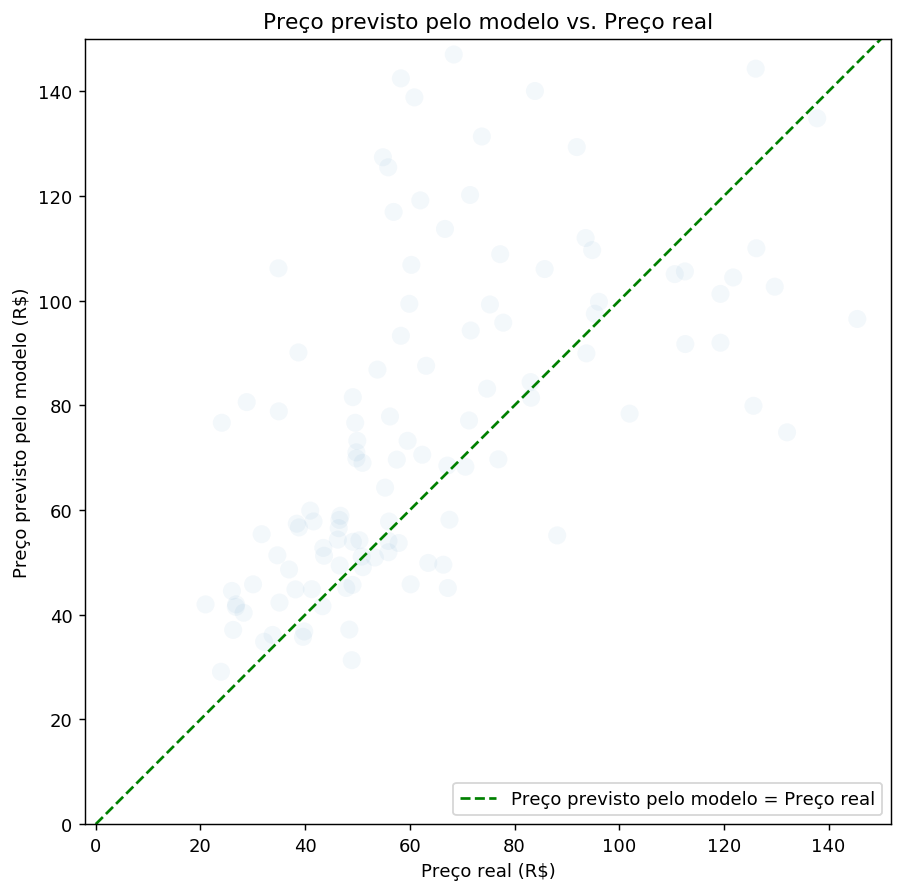

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 136.03)
('Std prediction error: R$', 241.17)
('Mean absolute error using average: R$', 246.75)
('Std prediction error using average: R$', 251.51)
('Mean absolute error using median: R$', 219.65)
('Std prediction error using median: R$', 317.79)
== Relative
('Mean relative absolute prediction error: ', 0.58)
('Std relative prediction error: ', 0.78)
('Mean relative absolute error using average: ', 2.38)
('Std relative prediction error using average: ', 2.49)
('Mean absolute error using median: R$', 0.97)
('Std prediction error using median: R$', 0.8)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 4.0, 0.0403278139131, 0.00721962...",2186.8470,2248.956318,2407.365,0.951125,0.888540,0.864001,344.2230,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,141485.441558,345.000000,4.76,4.621333,16.000000,23.100000,2.500000,523.418147,0.040328,4,0.007220
1.993779e+09,"[1993779221.0, 8.0, 0.090540602438, 0.01281563...",1257.7565,1074.886318,1233.295,0.908839,0.792105,0.926866,99.2435,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,141485.441558,449.166667,4.76,4.621333,16.651585,23.610375,2.492795,523.418147,0.090541,8,0.012816
9.158984e+07,"[91589843.0, 2.0, 0.027205033319, 0.0025213137...",1165.1265,1606.646318,1765.055,0.934505,0.850636,0.616874,723.6335,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,4.76,4.621333,21.000000,26.000000,3.200000,523.418147,0.027205,2,0.002521
1.895458e+09,"[1895458154.0, 1.0, 0.0169664871907, 0.0, 1414...",1149.8320,1379.366318,1537.775,0.925545,0.830203,0.692053,511.6480,1661.48,1897,A Transition to Advanced Mathematics,https://www.amazon.com.br/dp/1285463269/,"Douglas Smith (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285463269,978-1285463261,Inglês,1,1661.48,141485.441558,448.000000,4.76,4.621333,19.000000,23.500000,1.900000,748.000000,0.016966,1,0.000000
1.088718e+09,"[1088718135.0, 12.0, 0.0978898264304, 0.015600...",1029.9835,854.166318,1012.575,0.891132,0.751722,0.906452,106.2965,1136.28,1830,Geometric Algebra,https://www.amazon.com.br/dp/0471608394/,E. Artin (Autor),Capa comum,Wiley-Blackwell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471608394,978-0471608394,Inglês,1,1136.28,141485.441558,224.000000,4.76,4.621333,14.700000,22.900000,1.200000,308.000000,0.097890,12,0.015601
1.159398e+09,"[1159397835.0, 1.0, 0.00273052880987, 0.0, 141...",991.6705,1087.066318,1245.475,0.909650,0.793954,0.724281,377.5095,1369.18,1703,Mathematical Statistics and Data Analysis [Wit...,https://www.amazon.com.br/dp/0534399428/,John A. Rice (Autor),Capa dura,Duxbury Resource Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8131519546,978-8131519547,Inglês,1,1369.18,141485.441558,603.000000,4.76,4.621333,18.400000,23.500000,3.200000,523.418147,0.002731,1,0.000000
2.187742e+09,"[2187741581.0, 1.0, 0.0153965453683, 0.0, 2873...",806.7235,1002.506318,1160.915,0.903703,0.780391,0.627986,477.8965,1284.62,1952,Advanced Engineering Mathematics,https://www.amazon.com.br/dp/0470458364/,Erwin Kreyszig (Autor),Capa dura,Wiley,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,NaN,NaN,NaN,NaN,NaN,0470458364,978-0470458365,Inglês,1,1284.62,287341.000000,1280.000000,4.76,4.621333,10.000000,25.300000,4.700000,523.418147,0.015397,1,0.000000
2.866815e+09,"[2866815273.0, 2.0, 0.0212950647688, 0.0034953...",796.2825,1082.826318,1241.

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.139033e+08,"[913903309.0, 1.0, 0.00309902099233, 0.0, 1032...",391.7635,214.213682,55.805,0.821870,3.154841,5.769713,459.6635,67.90,219,Os elementos,https://www.amazon.com.br/dp/8571399352/,Irineu Bicudo (Autor),Capa dura,UNESP,NaN,NaN,Livros,Livros,Ciências,Matemática,Geometria e Topologia,NaN,NaN,NaN,NaN,NaN,NaN,8571399352,978-8571399358,Português,1,67.90,10326.000000,600.000000,6.00,4.100000,16.600000,23.000000,3.600000,523.418147,0.003099,1,0.000000
1.487078e+08,"[148707819.0, 1.0, 0.0039407325559, 0.0, 19830...",401.1735,198.673682,40.265,0.482562,2.381036,4.807928,484.6135,83.44,2252,Maker of Patterns – An Autobiography Through L...,https://www.amazon.com.br/dp/0871403862/,Freeman Dyson (Autor),Capa dura,Liveright,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0871403862,978-0871403865,Inglês,1,83.44,198305.000000,416.000000,1.00,5.000000,16.800000,24.400000,3.600000,739.000000,0.003941,1,0.000000
1.424523e+09,"[1424522791.0, 2.0, 0.0260692021262, 0.0015885...",273.5275,214.703682,56.295,0.835113,3.185042,4.057669,340.9375,67.41,1886,The Circle: A Mathematical Exploration beyond ...,https://www.amazon.com.br/dp/1633881679/,"Alfred S. Posamentier (Autor),",Capa dura,Prometheus Books,NaN,23 de agosto de 2016,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,Geometria Algébrica,NaN,NaN,NaN,NaN,1633881679,978-1633881679,Inglês,1,67.41,148992.000000,300.000000,4.76,4.621333,16.000000,23.600000,3.000000,363.000000,0.026069,2,0.001589
1.137125e+09,"[1137125358.0, 1.0, 0.00589851940053, 0.0, 137...",306.6575,203.113682,44.705,0.565886,2.571059,3.881741,385.6575,79.00,308,The Mathematics Lover`s Companion – Masterpiec...,https://www.amazon.com.br/dp/0300223005/,Edward R. Scheinerman (Autor),Capa dura,Yale University Press,NaN,2 de maio de 2017,Livros,Livros,Inglês e Outras Línguas,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,0300223005,978-0300223002,Inglês,1,79.00,137831.000000,296.000000,4.76,4.621333,16.500000,23.500000,2.500000,599.000000,0.005899,1,0.000000
3.518019e+09,"[3518019432.0, 1.0, 0.00096173678938, 0.0, 127...",228.7935,210.923682,52.515,0.737674,2.962827,3.213843,299.9835,71.19,2139,"Faraday, Maxwell, and the Electromagnetic Fiel...",https://www.amazon.com.br/dp/1616149426/,"Nancy Forbes (Autor),",Capa dura,Prometheus Books,NaN,11 de março de 2014,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Teoria Eletromagnética,NaN,NaN,NaN,NaN,1616149426,978-1616149420,Inglês,1,71.19,127860.000000,320.000000,2.00,5.000000,16.000000,23.600000,2.700000,540.000000,0.000962,1,0.000000
1.167407e+09,"[1167406586.0, 4.0, 0.0327389720784, 0.0072302...",120.1200,239.603682,81.195,1.910021,5.636407,2.825688,162.6300,42.51,350,Solutions of Exercises of Tensor Calculus Made...,https://www.amazon.com.br/dp/1979870705/,Taha Sochi (Autor),Capa comum,Createspace Independent Publishing Platform,NaN,19 de novembro de 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979870705,978-1979870702,Inglês,1,42.51,141485.441558,90.000000,4.76,4.621333,21.600000,27.900000,0.500000,290.000000,0.032739,4,0.007230
1.879984e+09,"[1879983517.0, 2.0, 0.0115909767444, 0.0031488...",310.6115,165.983682,7.575,0.065229,1.429292,2.674688,426.7415,116.13,1853,Burn Math Class: And Reinvent Mathematics for ...,https://www.amazon.com.br/dp/0465053734/,Jason Wilkes (Autor),Capa dura,Basic Boo

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.587200e+09,"[1587199610.0, 3.0, 0.0186210065176, 0.0048383...",0.0400,105.593682,52.815,0.299201,0.598197,0.000227,176.4800,176.52,2110,Emmy Noether's Wonderful Theorem,https://www.amazon.com.br/dp/1421422670/,Dwight E. Neuenschwander (Autor),Capa comum,Johns Hopkins University Press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1421422670,978-1421422671,Inglês,1,176.52,141485.441558,344.0,4.76,4.621333,15.2,22.9,2.1,440.000000,0.018621,3,0.004838
1.604078e+09,"[1604078256.0, 63.0, 0.231727841853, 0.1862660...",0.3080,231.313682,72.905,1.435138,4.553419,0.006063,51.1080,50.80,25,The Number Theory,https://www.amazon.com.br/dp/0486682528/,"George E. Andrews (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Matemática Pura,Teoria dos Números,NaN,NaN,NaN,NaN,0486682528,978-0486682525,Inglês,1,50.80,59804.000000,259.0,4.76,4.621333,14.0,22.2,1.9,318.000000,0.231728,63,0.186266
1.497794e+09,"[1497794236.0, 1.0, 0.0039407325559, 0.0, 1414...",1.0235,75.323682,83.085,0.401784,0.364252,0.004949,205.7665,206.79,2242,Quantum Sense and Nonsense,https://www.amazon.com.br/dp/3319652702/,Jean Bricmont (Autor),Capa comum,Springer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3319652702,978-3319652702,Inglês,1,206.79,141485.441558,298.0,4.76,4.621333,15.5,23.5,1.8,358.000000,0.003941,1,0.000000
5.239968e+08,"[523996777.0, 2.0, 0.025911446802, 0.001225506...",1.3250,214.943682,56.535,0.841670,3.199995,0.019726,68.4950,67.17,2211,Geometry: A Comprehensive Course,https://www.amazon.com.br/dp/0486658120/,"Daniel Pedoe (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,NaN,NaN,NaN,NaN,NaN,0486658120,978-0486658124,Inglês,1,67.17,62320.000000,464.0,4.76,4.621333,16.6,23.4,2.2,612.000000,0.025911,2,0.001226
4.149148e+09,"[4149148350.0, 1.0, 0.00090102183083, 0.0, 204...",1.3785,199.043682,40.635,0.489166,2.396096,0.016594,84.4485,83.07,75,Variáveis Complexas e Aplicações,https://www.amazon.com.br/dp/8580555175/,James Ward Brown (Autor),Capa comum,Mc Graw Hill,NaN,NaN,Livros,Livros,Ciências,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8580555175,978-8580555172,Português,1,83.07,20419.000000,480.0,3.00,5.000000,15.6,22.8,2.4,703.000000,0.000901,1,0.000000
3.929671e+09,"[3929670580.0, 5.0, 0.040928349548, 0.00898546...",1.5660,73.686318,232.095,0.652319,0.207100,0.004401,357.3660,355.80,2088,"Elements of Algebra: Geometry, Numbers, Equations",https://www.amazon.com.br/dp/0387942904/,John C. Stillwell (Autor),Capa dura,Springer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0387942904,978-0387942902,Inglês,1,355.80,141485.441558,184.0,4.76,4.621333,15.6,23.4,1.3,458.000000,0.040928,5,0.008985
1.324115e+09,"[1324114802.0, 13.0, 0.0951520315675, 0.022793...",1.6810,238.803682,80.395,1.856269,5.513823,0.038813,41.6290,43.31,1832,Asymptotic Methods in Analysis,https://www.amazon.com.br/dp/0486642216/,"N. G. de Bruijn (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,0486642216,978-0486642215,Inglês,1,43.31,60391.000000,224.0,4.76,4.621333,14.0,21.6,1.2,227.000000,0.095152,13,0.022793
1.644753e+09,"[1644752655.0, 1.0, 0.00090102183083, 0.0, 186...",1.7055,198.953682,40.545,0.487554,2.392420,0.020509,81.4545,83.16,57,"Curso de Física Básica: ótica, Relatividade, F...",https:

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.587200e+09,"[1587199610.0, 3.0, 0.0186210065176, 0.0048383...",0.0400,105.593682,52.815,0.299201,0.598197,0.000227,176.4800,176.52,2110,Emmy Noether's Wonderful Theorem,https://www.amazon.com.br/dp/1421422670/,Dwight E. Neuenschwander (Autor),Capa comum,Johns Hopkins University Press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1421422670,978-1421422671,Inglês,1,176.52,141485.441558,344.0,4.76,4.621333,15.2,22.9,2.1,440.000000,0.018621,3,0.004838
1.604078e+09,"[1604078256.0, 63.0, 0.231727841853, 0.1862660...",0.3080,231.313682,72.905,1.435138,4.553419,0.006063,51.1080,50.80,25,The Number Theory,https://www.amazon.com.br/dp/0486682528/,"George E. Andrews (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Matemática Pura,Teoria dos Números,NaN,NaN,NaN,NaN,0486682528,978-0486682525,Inglês,1,50.80,59804.000000,259.0,4.76,4.621333,14.0,22.2,1.9,318.000000,0.231728,63,0.186266
1.497794e+09,"[1497794236.0, 1.0, 0.0039407325559, 0.0, 1414...",1.0235,75.323682,83.085,0.401784,0.364252,0.004949,205.7665,206.79,2242,Quantum Sense and Nonsense,https://www.amazon.com.br/dp/3319652702/,Jean Bricmont (Autor),Capa comum,Springer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3319652702,978-3319652702,Inglês,1,206.79,141485.441558,298.0,4.76,4.621333,15.5,23.5,1.8,358.000000,0.003941,1,0.000000
5.239968e+08,"[523996777.0, 2.0, 0.025911446802, 0.001225506...",1.3250,214.943682,56.535,0.841670,3.199995,0.019726,68.4950,67.17,2211,Geometry: A Comprehensive Course,https://www.amazon.com.br/dp/0486658120/,"Daniel Pedoe (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,NaN,NaN,NaN,NaN,NaN,0486658120,978-0486658124,Inglês,1,67.17,62320.000000,464.0,4.76,4.621333,16.6,23.4,2.2,612.000000,0.025911,2,0.001226
4.149148e+09,"[4149148350.0, 1.0, 0.00090102183083, 0.0, 204...",1.3785,199.043682,40.635,0.489166,2.396096,0.016594,84.4485,83.07,75,Variáveis Complexas e Aplicações,https://www.amazon.com.br/dp/8580555175/,James Ward Brown (Autor),Capa comum,Mc Graw Hill,NaN,NaN,Livros,Livros,Ciências,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8580555175,978-8580555172,Português,1,83.07,20419.000000,480.0,3.00,5.000000,15.6,22.8,2.4,703.000000,0.000901,1,0.000000
3.929671e+09,"[3929670580.0, 5.0, 0.040928349548, 0.00898546...",1.5660,73.686318,232.095,0.652319,0.207100,0.004401,357.3660,355.80,2088,"Elements of Algebra: Geometry, Numbers, Equations",https://www.amazon.com.br/dp/0387942904/,John C. Stillwell (Autor),Capa dura,Springer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0387942904,978-0387942902,Inglês,1,355.80,141485.441558,184.0,4.76,4.621333,15.6,23.4,1.3,458.000000,0.040928,5,0.008985
1.324115e+09,"[1324114802.0, 13.0, 0.0951520315675, 0.022793...",1.6810,238.803682,80.395,1.856269,5.513823,0.038813,41.6290,43.31,1832,Asymptotic Methods in Analysis,https://www.amazon.com.br/dp/0486642216/,"N. G. de Bruijn (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,0486642216,978-0486642215,Inglês,1,43.31,60391.000000,224.0,4.76,4.621333,14.0,21.6,1.2,227.000000,0.095152,13,0.022793
1.644753e+09,"[1644752655.0, 1.0, 0.00090102183083, 0.0, 186...",1.7055,198.953682,40.545,0.487554,2.392420,0.020509,81.4545,83.16,57,"Curso de Física Básica: ótica, Relatividade, F...",https:

### Relative errors distribution

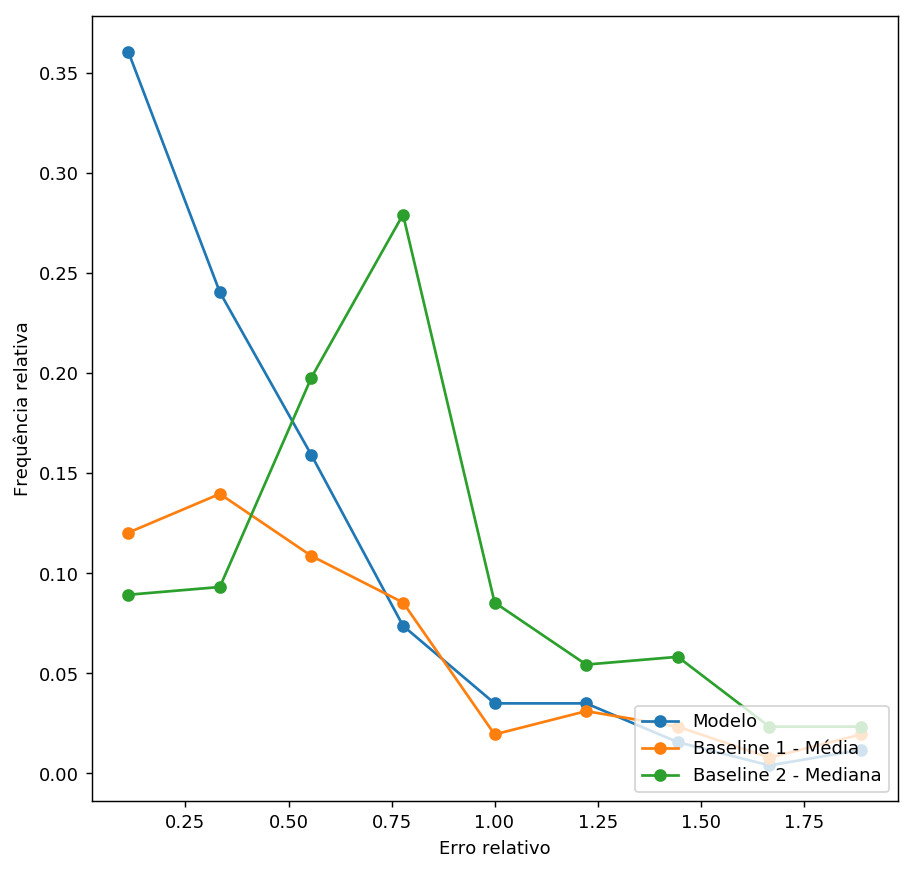

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

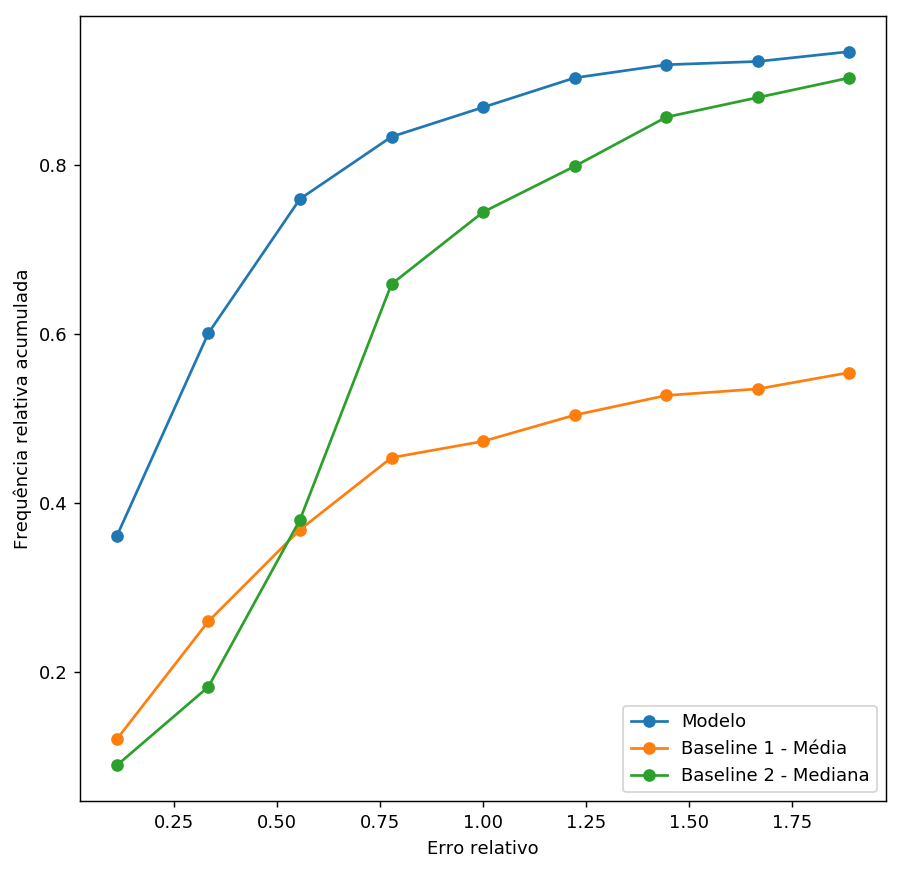

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,0.0,0.0,0.0,0.0,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,136.034767,246.751617,219.650039,0.966425,2.376863,0.580766,236.443535,282.113682,1187.306202,NaN,NaN,NaN,NaN,1.0,282.113682,137752.723095,431.824935,4.716899,4.616982,16.508364,23.507953,2.405674,519.609400,0.032849,6.038760,0.012432
std,241.635890,252.000696,318.409650,0.800154,2.494373,0.777377,195.575802,353.026378,1010.042090,NaN,NaN,NaN,NaN,0.0,353.026378,96051.435057,252.935902,3.449814,0.325175,2.537253,2.050391,1.116161,216.049396,0.045996,13.405617,0.035133
min,0.040000,0.086318,1.935000,0.015401,0.000306,0.000227,29.114500,20.970000,1.000000,NaN,NaN,NaN,NaN,1.0,20.970000,1053.000000,48.000000,1.000000,1.000000,10.000000,17.000000,0.500000,40.800000,0.000665,1.000000,0.000000
25%,16.336125,154.843159,54.265000,0.529514,0.432022,0.145277,78.011000,58.290000,93.250000,NaN,NaN,NaN,NaN,1.0,58.290000,65183.750000,281.750000,4.760000,4.621333,14.600000,22.200000,1.600000,367.500000,0.005899,1.000000,0.000000
50%,53.029000,210.863682,83.480000,0.748221,1.281094,0.341511,164.728250,123.705000,1700.000000,NaN,NaN,NaN,NaN,1.0,123.705000,141485.441558,373.500000,4.760000,4.621333,15.900000,23.400000,2.300000,523.418147,0.015397,2.000000,0.002866
75%,151.470625,239.403682,284.035000,1.122234,3.839830,0.657776,384.902250,407.740000,1962.500000,NaN,NaN,NaN,NaN,1.0,407.740000,151933.000000,515.000000,4.760000,4.621333,18.400000,24.600000,3.100000,665.750000,0.042966,5.000000,0.008467
85%,239.653200,255.583182,391.646500,1.525500,4.759492,0.924132,446.241150,515.351500,2100.350000,NaN,NaN,NaN,NaN,1.0,515.351500,206108.000000,640.450000,4.760000,4.700000,19.345000,25.500000,3.600000,764.250000,0.064331,7.000000,0.011338
90%,355.168450,344.392318,502.801000,1.980593,5.797350,1.323737,487.412450,626.506000,2136.900000,NaN,NaN,NaN,NaN,1.0,626.506000,287377.900000,751.600000,4.760000,5.000000,20.300000,26.260000,3.800000,795.200000,0.077603,10.000000,0.016443
95%,557.274275,804.271318,962.680000,2.580423,7.165283,2.197777,553.186275,1086.385000,2207.600000,NaN,NaN,NaN,NaN,1.0,1086.385000,358516.850000,946.400000,6.150000,5.000000,21.215000,27.700000,4.430000,885.000000,0.105671,22.150000,0.070367


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
26.1069438457


<img src="files/image.png">